# Generate H5AD Input

In [4]:
# Import Packages

%load_ext autoreload
%autoreload 2

import os
# import warnings 
# warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from anndata import AnnData

# Customized packages
import starmap.sc_util as su

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## AnnData

In [5]:
# Set path
ppath = 'Z:/Data/Processed/2022-09-30-Rena-Cardiomyocyte64Gene/output'
areas = range(1,7)

In [7]:
# Load whole cell data
structure = 'whole_cell'
expr_path = os.path.join(ppath, structure, 'complete_cell_barcode_count.csv')
var_path = os.path.join(ppath, structure, 'cell_barcode_names.csv')
obs_path = os.path.join(ppath, structure, 'complete_meta.csv')

expr_x = np.loadtxt(expr_path, delimiter=',')
var = pd.read_csv(var_path, header=None)
var = pd.DataFrame(index=var.iloc[:,2].to_list())
obs = pd.read_csv(obs_path, index_col=0)

In [8]:
# create AnnData object
adata = AnnData(X=expr_x, dtype=int, var=var, obs=obs)
adata

c:\Users\wangk\.conda\envs\connie\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 9629 × 64
    obs: 'orig_index', 'sample', 'area', 'x', 'y', 'z'

In [9]:
# Load nucleus data
structure = 'nucleus'
expr_path = os.path.join(ppath, structure, 'complete_cell_barcode_count.csv')
var_path = os.path.join(ppath, structure, 'cell_barcode_names.csv')
obs_path = os.path.join(ppath, structure, 'complete_meta.csv')

# Add expression data to the AnnData object 
expr_x = np.loadtxt(expr_path, delimiter=',')
obs = pd.read_csv(obs_path, index_col=0)

adata.layers['nucleus'] = expr_x.astype(int)
adata.obs['nuclues_volume'] = list(obs['area'])

In [36]:
adata.obs

,orig_index,sample,area,x,y,z,nuclues_volume
0,0,1,1909030,207,12290,14,424563
1,1,1,938457,141,6935,16,254098
2,2,1,319251,74,10321,16,116817
3,3,1,1391167,182,10073,14,57744
4,4,1,328536,79,5183,15,82780
...,...,...,...,...,...,...,...
9624,1384,6,658458,20239,7082,14,233127
9625,1385,6,318836,20220,9478,9,128602
9626,1386,6,639378,20277,11077,12,127610
9627,1387,6,345181,20281,12452,11,142509


In [21]:
# load AF546
AF546 = 0
for a in areas:
    af546 = pd.read_csv(os.path.join(ppath, '2022-10-15-merged-points', f'Area_{a}', 'AF546_cell_counts.csv'))
    if type(AF546) == int:
        AF546 = af546
    else: AF546 = pd.concat([AF546, af546], axis=0)
AF546

,whole_cell,nucleus
0,13,0
1,0,0
2,1,0
3,5,0
4,1,0
...,...,...
1384,1,0
1385,2,2
1386,0,0
1387,2,0


In [38]:
adata.obs['AF546'] = list(AF546['whole_cell'])
adata.obs['AF546_nucleus'] = list(AF546['nucleus'])

In [40]:
adata.obs

,orig_index,sample,area,x,y,z,nuclues_volume,AF546,AF546_nucleus
0,0,1,1909030,207,12290,14,424563,13,0
1,1,1,938457,141,6935,16,254098,0,0
2,2,1,319251,74,10321,16,116817,1,0
3,3,1,1391167,182,10073,14,57744,5,0
4,4,1,328536,79,5183,15,82780,1,0
...,...,...,...,...,...,...,...,...,...
9624,1384,6,658458,20239,7082,14,233127,1,0
9625,1385,6,318836,20220,9478,9,128602,2,2
9626,1386,6,639378,20277,11077,12,127610,0,0
9627,1387,6,345181,20281,12452,11,142509,2,0


## QC

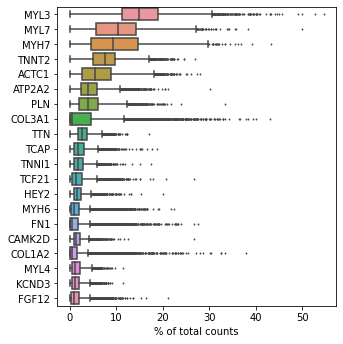

In [41]:
# Plot top 20 most expressed genes 
sc.pl.highest_expr_genes(adata, n_top=20)

## Regular Filtration

In [42]:
# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata, percent_top=None, inplace=True)
# Calculate max count for each gene
adata.var['max_counts'] = adata.X.max(axis=0)

In [43]:
adata.obs

,orig_index,sample,area,x,y,z,nuclues_volume,AF546,AF546_nucleus,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts
0,0,1,1909030,207,12290,14,424563,13,0,58,4.077537,2492,7.821242
1,1,1,938457,141,6935,16,254098,0,0,63,4.158883,2164,7.680176
2,2,1,319251,74,10321,16,116817,1,0,48,3.891820,727,6.590301
3,3,1,1391167,182,10073,14,57744,5,0,60,4.110874,1883,7.541152
4,4,1,328536,79,5183,15,82780,1,0,46,3.850148,337,5.823046
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9624,1384,6,658458,20239,7082,14,233127,1,0,24,3.218876,170,5.141664
9625,1385,6,318836,20220,9478,9,128602,2,2,27,3.332205,98,4.595120
9626,1386,6,639378,20277,11077,12,127610,0,0,31,3.465736,142,4.962845
9627,1387,6,345181,20281,12452,11,142509,2,0,37,3.637586,138,4.934474


In [44]:
adata.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,max_counts
ATP2A2,9383,22.347077,3.150472,2.554782,215180,12.279235,528
PLN,8969,23.426212,3.195657,6.854294,225571,12.326395,837
TNNI1,8612,12.466196,2.600183,10.561844,120037,11.695564,632
TNNT2,9540,37.781805,3.657951,0.924291,363801,12.804365,1638
TNNI3,5250,3.337211,1.467231,45.477204,32134,10.377701,221
...,...,...,...,...,...,...,...
DCN,4363,1.750649,1.011837,54.688960,16857,9.732581,132
PDGFRA,3961,1.081836,0.733250,58.863849,10417,9.251290,62
FN1,6563,8.837159,2.286167,31.841313,85093,11.351512,619
TRPM3,5950,1.493301,0.913608,38.207498,14379,9.573594,23


In [45]:
def plot_stats_per_cell(adata, color='sample', save=False):
    plt.figure(figsize=(15, 5))

    reads_per_cell = adata.obs['total_counts']
    genes_per_cell = adata.obs['n_genes_by_counts']

    plt.subplot(1, 3, 1)
    sns.histplot(reads_per_cell)
    plt.ylabel('# cells')
    plt.xlabel('# reads')

    plt.subplot(1, 3, 2)
    sns.histplot(genes_per_cell)
    plt.ylabel('# cells')
    plt.xlabel('# genes')

    plt.subplot(1, 3, 3)
    plt.title(
        'R=%f' % np.corrcoef(reads_per_cell.T, genes_per_cell)[0, 1])  # Pearson product-moment correlation coefficients
    sns.scatterplot(data=adata.obs, x='total_counts', y='n_genes_by_counts', hue=color, s=5)
    plt.xlabel("Reads per cell")
    plt.ylabel("Genes per cell")
    plt.legend(loc='lower right')
    plt.tight_layout()

    if save:
        # current_fig_path = os.path.join(os.getcwd(), "output/figures/cell_stats.pdf")
        current_fig_path = "./figures/cell_stats.pdf"
        plt.savefig(current_fig_path)
    plt.show()

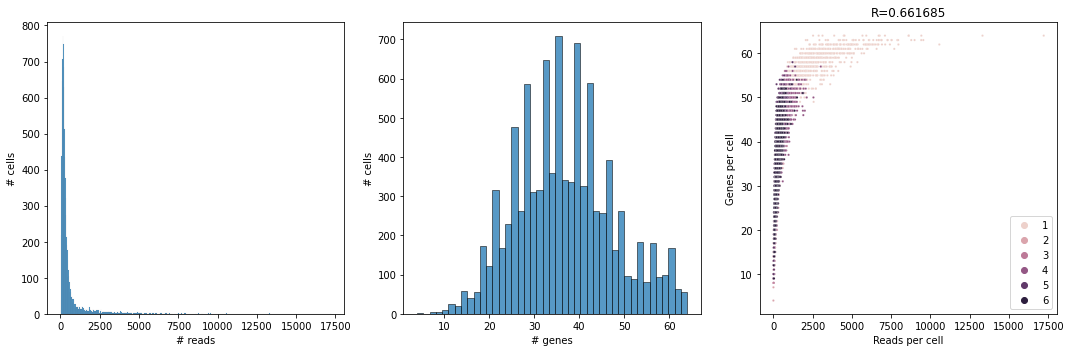

In [46]:
# Per-cell Stats Plot
plot_stats_per_cell(adata, save=False)

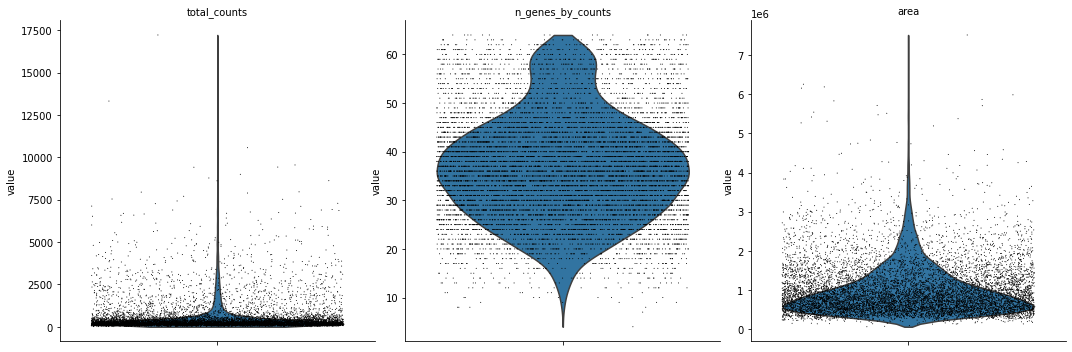

In [47]:
sc.pl.violin(adata, ['total_counts', 'n_genes_by_counts', 'area'],
             jitter=0.4, multi_panel=True)

In [48]:
# Get quantiles of reads
su.show_reads_quantile(adata)

Reads per cell quantile:
0.10      97.0
0.25     150.0
0.50     242.0
0.75     432.0
0.90    1136.6
Name: total_counts, dtype: float64


## Output

In [49]:
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
adata.write_h5ad(os.path.join(ppath, '2022-10-22-Rena-Cardiac64Gene-raw.h5ad'))

In [50]:
# test
adata = sc.read_h5ad(os.path.join(ppath, '2022-10-22-Rena-Cardiac64Gene-raw.h5ad'))
adata

AnnData object with n_obs × n_vars = 9629 × 64
    obs: 'orig_index', 'sample', 'area', 'x', 'y', 'z', 'nuclues_volume', 'AF546', 'AF546_nucleus', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'max_counts'
    layers: 'nucleus'

In [51]:
adata.X

array([[124,  28,  45, ...,  20,   2,   4],
       [149, 122,  45, ...,  11,   4,  10],
       [ 66,  21,  12, ...,   3,   0,   0],
       ...,
       [  8,   1,   9, ...,   0,   0,   0],
       [  4,   1,   1, ...,   4,   1,   1],
       [  4,   6,   6, ...,   0,   0,   2]])